## Brussels. Step 2.b Dynamic Sampling Model and GREGWT, Non-Residential Model

In [1]:
import datetime; print(datetime.datetime.now())

2018-04-03 15:12:00.614979


**Notebook abstract**

This notebook shows the main sampling and reweighting algorithm for the non-residential sector.

### Import libraries

In [2]:
from smum.microsim.run import run_calibrated_model
from smum.microsim.util_plot import plot_data_projection
from smum.microsim.table import TableModel

/usr/lib/python3.6/site-packages/h5py-2.7.1-py3.6-linux-x86_64.egg/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Global variables

In [3]:
iterations = 10000
benchmark_year = 2016
census_file = 'data/benchmarks_nonresidential.csv'
typ = 'resampled'
model_name = 'Brussels_NonResidentialElectricity_wbias_projected_dynamic_{}'.format(typ)
verbose = False
drop_col_survey = ['h_BuildingHeat', 'c_BuldingCool', 'e_BuildingElec',
                   'h_BuildingSqm', 'c_BuildingSqm']

### Define model

In [4]:
tm = TableModel(census_file = census_file, verbose=verbose)
table_model_name = 'data/table_elec_nr_{}.csv'

#### Electricity

In [5]:
tm.add_model(table_model_name.format('e'), 'elec', static = True)
tm.add_model(table_model_name.format('h'), 'heat', static = True)
tm.add_model(table_model_name.format('c'), 'cool', static = True)

In [6]:
tm.models['cool'].loc[2020]

,co_mu,co_sd,p,dis,lb,ub
c_BuildingSqm,"3600.0,525.0,11100.0,12000.0,4650.0,105.0,105....","36.0,5.25,111.0,120.0,46.5,1.05,1.05,0.39,1.05...","0.00383471907281,0.00152179390275,0.0001305114...",Deterministic;c;Categorical,0,inf
c_BuildingCool,"42.9002267754,125.188571429,23.4353153153,31.9...","0.429002267754,1.25188571429,0.234353153153,0....","0.00383471907281,0.00152179390275,0.0001305114...",Deterministic;BuildingSqm;Categorical,0,inf


In [7]:
formula_nrb = "c_e_BuildingElec * e_BuildingElec * c_e_BuildingSqm * e_BuildingSqm"
tm.add_formula(formula_nrb, 'elec')

In [8]:
formula_nrb = "c_h_BuildingHeat * h_BuildingHeat * c_e_BuildingSqm * e_BuildingSqm"
tm.add_formula(formula_nrb, 'heat')

In [9]:
formula_nrb = "c_c_BuildingCool * c_BuildingCool * c_e_BuildingSqm * e_BuildingSqm"
tm.add_formula(formula_nrb, 'cool')

In [10]:
table_model = tm.make_model()
tm.to_excel()

creating data/tableModel_elec.xlsx
creating data/tableModel_heat.xlsx
creating data/tableModel_cool.xlsx


### Run model

In [11]:
fw = run_calibrated_model(
    table_model,
    verbose = verbose,
    project = typ,
    census_file = census_file,
    year = benchmark_year,
    population_size = False,
    name = '{}_{}'.format(model_name, iterations),
    iterations = iterations,
    align_census = False,
    drop_col_survey = drop_col_survey
)

loop: 1/4; calibrating: elec; sufix = loop_1
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:23<00:00, 455.19it/s]


loop: 2/4; calibrating: heat; sufix = loop_2
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:19<00:00, 543.54it/s]


loop: 3/4; calibrating: cool; sufix = loop_3
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:23<00:00, 458.32it/s]


loop: 4/4; final loop, for variables: elec, heat, cool; sufix = loop_4
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:16<00:00, 627.62it/s]


Calibration Error:
	3.3307E-16  elec
	0.0000E+00  heat
	6.7581E-02  cool
Projecting sample survey for 10 steps via resample
resampling for year 2016
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:20<00:00, 508.07it/s]


resampling for year 2017
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:18<00:00, 588.58it/s]


resampling for year 2018
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:23<00:00, 457.96it/s]


resampling for year 2019
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:15<00:00, 673.32it/s]


resampling for year 2020
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:23<00:00, 453.25it/s]


resampling for year 2021
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:17<00:00, 614.26it/s]


resampling for year 2022
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:23<00:00, 442.77it/s]


resampling for year 2023
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:15<00:00, 678.84it/s]


resampling for year 2024
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:24<00:00, 432.95it/s]


resampling for year 2025
Computing model:  elec
Computing model:  heat
Computing model:  cool


100%|██████████| 10600/10600 [00:14<00:00, 718.34it/s]


### Plot results

In [12]:
reweighted_survey = 'data/survey_{}_{}'.format(model_name, iterations)

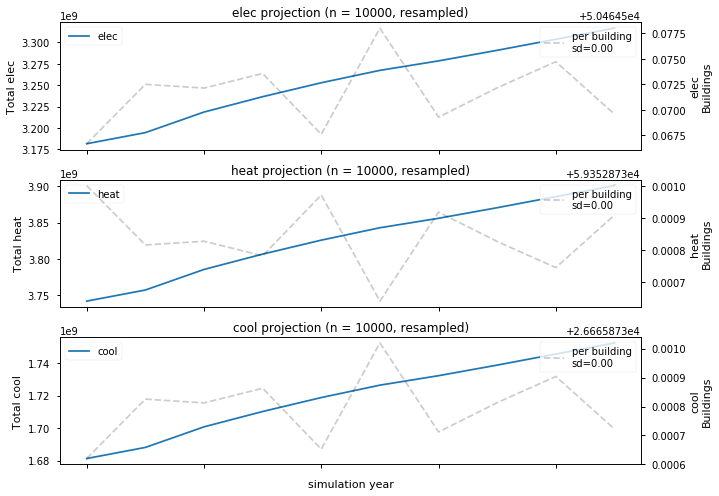

In [13]:
data = plot_data_projection(
    reweighted_survey, ['elec','heat','cool'], "{}, {}".format(iterations, typ),
    start_year = 2016, end_year = 2025, aspect_ratio = 4,
    benchmark_year = False, unit = "building")